In [2]:
# Read the python dataframe
import pandas as pd
df = pd.read_csv("36151-0003-Data.tsv", sep='\t', engine='python')
# Replace the empty values by NaN value
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)
# Find the number of valid values for each column
counts = df.count().to_frame('count')
print("NUmber of columns in the given data = ", counts.shape[0])
# Select the columns that have 3/4 th values as valid
filter_columns_df = counts.loc[counts['count']>=int(df.shape[0]*0.75)]
filter_columns_list = filter_columns_df.index.tolist()
print("Number of columns chosen for analysis = ", filter_columns_df.shape[0])
# Drop the remaining columns from data frame
df = df[filter_columns_list]
df.shape

('NUmber of columns in the given data = ', 580)
('Number of columns chosen for analysis = ', 343)


(39523, 343)

In [3]:
pick_clms = ['ED6','WKANY5', 'WKANIMAL', 'WKAGLAB', 'WKFARM', 'WKNONAG', 'WKSALARY', 'WKNREGA']
df_sel = df.loc[:, pick_clms]
df_ed_work = df_sel.loc[:, ['ED6', 'WKANY5']]
df_ew_clean1 = df_ed_work[df_ed_work.ED6 != np.nan]
df_ew_clean = df_ew_clean1[df_ew_clean1.WKANY5 != np.nan]
df_ed_work.shape

In [17]:
df_sel = df.loc[:, pick_clms]
df_ed_work = df_sel.loc[:, ['ED6', 'WKANY5']]
df_ed_work.shape

(39523, 2)

In [33]:
df_ew_clean1 = df_ed_work[df_ed_work.ED6 != np.nan]
df_ew_clean = df_ew_clean1[df_ew_clean1.WKANY5 != np.nan]

In [240]:
count = 0;
def str_to_int(row):
    try:
        return int(row['ED6'])
    except:
        return -1
    
def employed(row):
    try:
        if row['WKANY5'] == 0:
            return 0
        else:
            return 1
    except:
        return 0
df_ew_clean['Education'] = df_ew_clean.apply(lambda row: str_to_int(row), axis=1)
df_ew_clean['Employed'] = df_ew_clean.apply(lambda row: employed(row), axis=1)
df_ew_clean = df_ew_clean[df_ew_clean.Education>=0]

In [242]:
emply_women = df_ew_clean[df_ew_clean.Employed==1]
unemploy_women = df_ew_clean[df_ew_clean.Employed==0]

In [263]:
emply_not_literate = emply_women[emply_women.Education==0].count()[0]
emply_primary = emply_women[(emply_women['Education'] > 0) & (emply_women['Education']<= 5)].count()[0]
emply_secondary = emply_women[(emply_women['Education'] > 5) & (emply_women['Education']<= 10)].count()[0]
emply_middle = emply_women[(emply_women.Education>10) & (emply_women.Education<=12)].count()[0]
emply_bachelors = emply_women[(emply_women.Education>12) & (emply_women.Education<16)].count()[0]
emply_higher = emply_women[(emply_women.Education>=16)].count()[0]
total_empl_count = emply_women.count()[0]

In [264]:
total_empl_count

19912

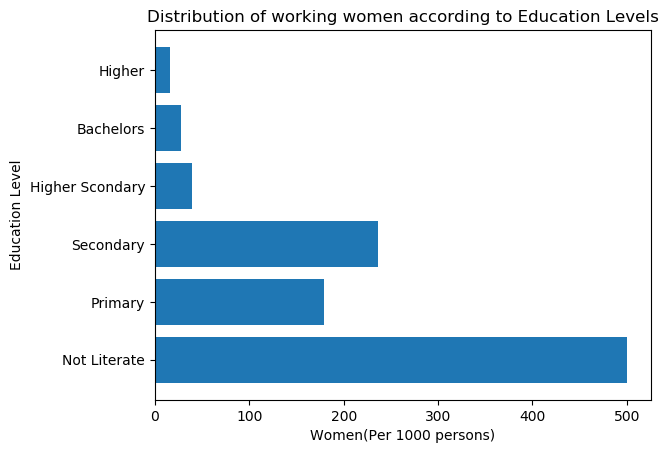

In [274]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ctgories= ('Not Literate', 'Primary', 'Secondary', 'Higher Scondary', 'Bachelors', 'Higher')
y_pos = [emply_not_literate, emply_primary, emply_secondary, emply_middle, emply_bachelors, emply_higher]
y_pos[:] = [x*1000/float(total_empl_count) for x in y_pos]
ax.barh(ctgories, y_pos, align='center')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(people)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
ax.set_ylabel('Education Level')
ax.set_xlabel('Women(Per 1000 persons)')
ax.set_title('Distribution of working women according to Education Levels')
plt.show()


In [266]:
not_literate = df_ew_clean[df_ew_clean.Education==0].count()[0]
primary = df_ew_clean[(df_ew_clean['Education'] > 0) & (df_ew_clean['Education']<= 5)].count()[0]
secondary = df_ew_clean[(df_ew_clean['Education'] > 5) & (df_ew_clean['Education']<= 10)].count()[0]
middle = df_ew_clean[(df_ew_clean.Education>10) & (df_ew_clean.Education<=12)].count()[0]
bachelors = df_ew_clean[(df_ew_clean.Education>12) & (df_ew_clean.Education<16)].count()[0]
higher = df_ew_clean[df_ew_clean.Education>=16].count()[0]
total_count = df_ew_clean.count()[0]

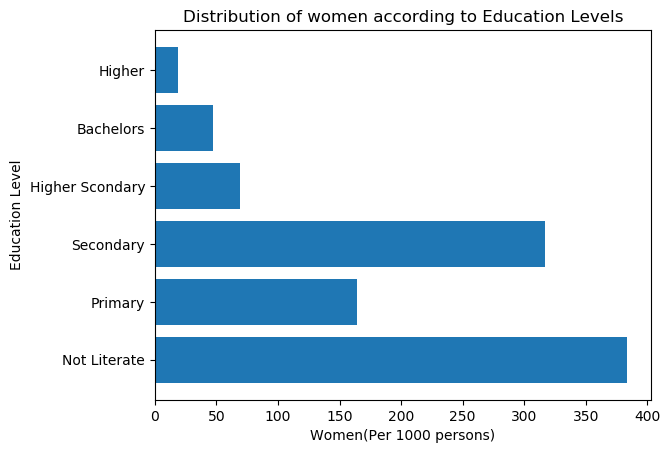

In [273]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ctgories= ('Not Literate', 'Primary', 'Secondary', 'Higher Scondary', 'Bachelors', 'Higher')
y_pos = [not_literate, primary, secondary, middle, bachelors, higher]
y_pos[:] = [x*1000/float(total_count) for x in y_pos]
ax.barh(ctgories, y_pos, align='center')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(people)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Education Level')
ax.set_xlabel('Women(Per 1000 persons)')
ax.set_title('Distribution of women according to Education Levels')

plt.show()

In [268]:
unemploy_not_literate = (not_literate-emply_not_literate)/float(not_literate)
unemploy_primary = (primary - emply_primary)/float(primary)
unemploy_secondary = (secondary-emply_secondary)/float(secondary)
unemploy_middle = (middle- emply_middle)/float(middle)
unemploy_bachelors = (bachelors-emply_bachelors)/float(bachelors)
unemploy_higher = (higher- emply_higher)/float(higher)

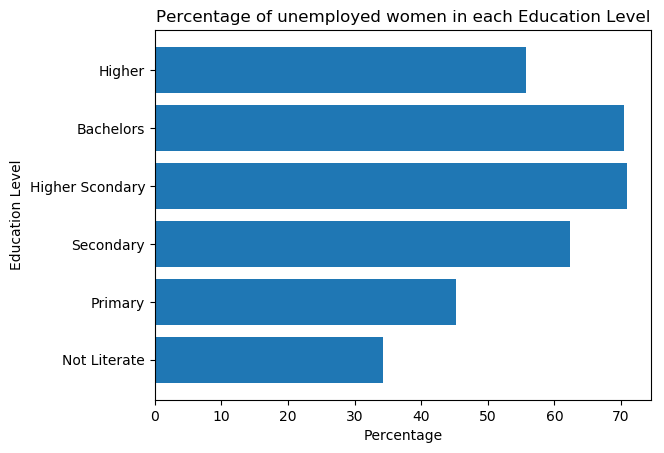

In [276]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ctgories= ('Not Literate', 'Primary', 'Secondary', 'Higher Scondary', 'Bachelors', 'Higher')
y_pos = [unemploy_not_literate, unemploy_primary, unemploy_secondary, unemploy_middle, unemploy_bachelors, unemploy_higher]
y_pos[:] = [x*100 for x in y_pos]
ax.barh(ctgories, y_pos, align='center')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(people)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performance')
ax.set_ylabel('Education Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of unemployed women in each Education Level')
plt.show()

In [112]:
stats = df_ew_clean.groupby('Education')['Employed'].value_counts()

In [123]:
stats.head()

Education  Employed
0          1           9966
           0           5199
1          1             79
           0             53
2          1            394
Name: Employed, dtype: int64

In [183]:
employed = stats.loc[:,1].tolist()
unemployed = stats.loc[:,0].tolist()
education = df_ew_clean['Education'].unique().tolist()
d = {'Education': education, 'Employed': employed, 'Unemployed':unemployed}
emp_stats = pd.DataFrame(d)
def unemprate(row):
    return (row['Unemployed']/float(row['Unemployed']+row['Employed']))
emp_stats['Unemp_rate'] = emp_stats.apply(lambda row:unemprate(row), axis=1)

In [184]:
emp_stats.head()

,Education,Employed,Unemployed,Unemp_rate
0,0,9966,5199,0.342829
1,8,79,53,0.401515
2,12,394,220,0.358306
3,15,558,337,0.376536
4,11,703,534,0.431690


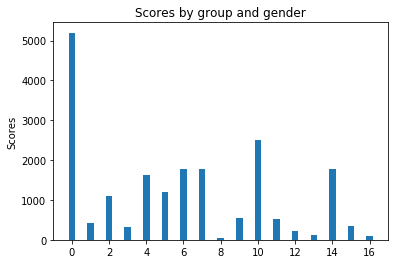

In [187]:
import numpy as np
import matplotlib.pyplot as plt


N = len(education)
rate = emp_stats['Unemp_rate']
emp = emp_stats['Employed']
unemp = emp_stats['Unemployed']
ind = education
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, unemp, width)
#p2 = plt.bar(ind, unemp, width,
#             bottom=emp)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
#plt.legend((p1[0], p2[0]), ('Employed', 'Unemployed'))

plt.show()

In [132]:
type(education)

numpy.ndarray

In [ ]:
EW5: EQ19 14.5 Relationship to Household head

EW6: EQ19 14.6 Age (in years)

EW7Y: EQ19 14.7c Year of birth

EW8: EQ20 14.8 Years of education completed

EW9: EQ20 14.9 N children alive

EW10: EQ20 14.10 Your general health

EW13A: EQ20 14.13a Mother lives in household

EW13B: EQ20 14.13b Father lives in household

EW14A: EQ20 14.14a Mother attended school

EW15A: EQ20 14.15a Mother education

EW15B: EQ20 14.15b Father education

EW16A: EQ20 14.16a Mother literate

EW16B: EQ20 14.16b Father literate

EW16C: EQ20 14.16c Mother-in-law literate

EW18A: EQ20 14.18a Brother highest education

EW18B: EQ20 14.18b Sister highest education

HB1: EQ21 15.1 Belief: 1-2 glasses of milk daily harmful during pregnancy

HB2: EQ21 15.2 Belief: Men physically weak months after sterilization

HB3: EQ21 15.3 Belief: 1st milk after birth good for baby

HB4: EQ21 15.4 Belief: Chulha smoke good for health

HB5: EQ21 15.5 Belief: Child diarrhea more to drink

HB6: EQ21 15.6 Belief: Illness spread through impure water

HB7: EQ21 15.7 Belief: How Malaria spreads

HB8: EQ21 15.8 Belief: Pregnancy most likely during menstrual cycle

AI1: EQ21 16.1 HIV/AIDS Awareness

GR9F: EQ23 17.9f Can visit health centre alone (permission needed or not)

GR13A: EQ23 17.13 Past 5 years: Been to metro city (beside current residence)

GR16A: EQ23 17.16 Past 5 years: Been to another state

GR17A: EQ23 17.17 Past 5 years: Been abroad

GR18A: EQ23 17.18a Are you a member of a: Mahila Mandal

GR18B: EQ23 17.18b Are you a member of a: Self-help group

GR22: EQ24 17.22 Family outings to cinema, mela, or restaurant

GR27A: EQ24 17.27a Family member has bank account

MH1A: EQ26 18.1a Age at marriage (in years)

MH1E: EQ26 18.1e Age first started menarche (in years)

MH2: EQ26 18.2 Marriage status

MH4A: EQ26 18.4a Who chose your husban

MH4B: EQ26 18.4b Did you have any say in choosing your husband

FP2A: EQ29 21.2a Currently use contraceptives

URBAN2011: Urban residence from census 2011

METRO: Largest 6 metro areas 0/1

ID11: HQ3 1.11 Religion

ID13: HQ3 1.13 Caste category

COPC: HQ23 14. Household expenditure /capita

INCOMEPC: HQ per capita income

NPERSONS: HQ4 2.0 N in household

ED2: HQ19 11.2 Education: Literacy

ED4: HQ19 11.4 Education: Attended school